In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

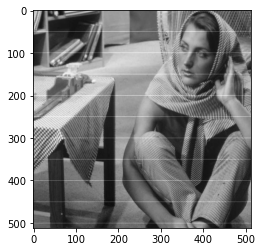

In [2]:
img = cv2.imread('Noise-lines.jpg',0)
# print(img)
plt.imshow(img,cmap='gray')
# img


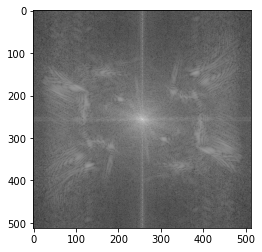

In [3]:
centered_fft=np.fft.fftshift(np.fft.fft2(img))
plt.imshow(1+np.log(np.abs(centered_fft)),cmap='gray')
plt.savefig('temp.png',dpi=600)

In [99]:
def filter_generate(m,n,type,scale_radius,x=0,y=0):
    filter = np.zeros([m,n])
    radius = scale_radius* filter.shape[0]

    if type=='butterworth':
        order = 4
        for i in range(filter.shape[0]):
            for j in range(filter.shape[1]):
                dist = ((i - filter.shape[0]/2+y)**2 + (j - filter.shape[1]/2 + x)**2)**0.5
                filter[i][j]=1/(1+(dist/radius)**(2*order))
    if type =='idealpf':
        for i in range(filter.shape[0]):
            for j in range(filter.shape[1]):
                dist = ((i - filter.shape[0]/2+y)**2 + (j - filter.shape[1]/2+x)**2)**0.5
                if dist < radius:
                    filter[i][j]=1

    return filter
    

In [100]:
m=img.shape[0]
n=img.shape[1]
print(m,n)
filter = np.ones([m,n])
center=n//2
# print(center)
filter[:,center-3:center+3]=0

512 512


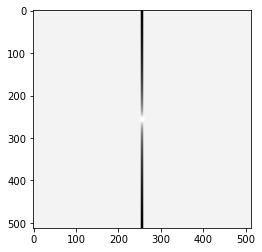

In [120]:
filter = filter+filter_generate(m,n,'butterworth',0.01)
plt.imshow(1+np.log(np.abs(filter)),cmap='gray')

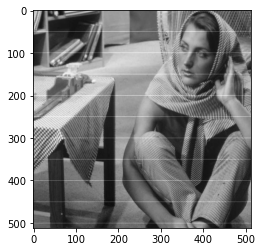

In [102]:
img_padded = np.zeros([m,n])
img_padded[0:img.shape[0],0:img.shape[1]]=img
plt.imshow(img_padded,cmap='gray')

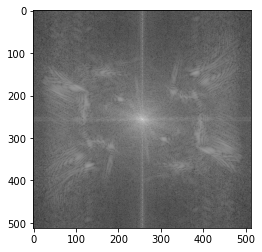

In [103]:
padded_dft = np.fft.fftshift(np.fft.fft2(img_padded))
plt.imshow(1+np.log(np.abs(padded_dft)),cmap='gray')

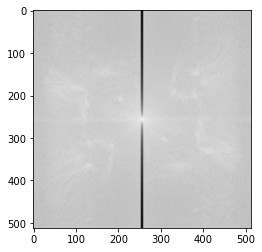

In [104]:
temp = np.multiply(padded_dft,filter)
plt.imshow(1+np.log(np.abs(temp)),cmap='gray')

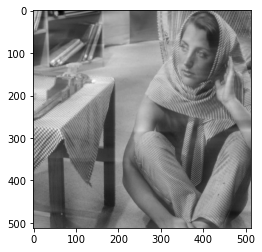

In [105]:
reconst = np.fft.ifft2(np.fft.ifftshift(temp))
plt.imshow(np.real(reconst),cmap='gray')

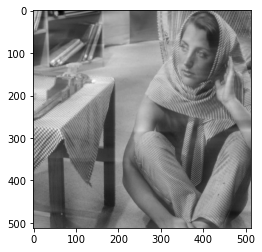

In [106]:
cropped = reconst[:img.shape[0],:img.shape[1]]
# print(cropped)
plt.imshow(np.real(cropped),cmap='gray')
plt.savefig('img.png',dpi=600)

In [117]:
spatial_filter = np.real(np.fft.ifft2(np.fft.ifftshift(filter)))

In [108]:
spatial_filter=spatial_filter[:m,:n]

In [118]:
spatial_filter.shape

(512, 512)

<ipython-input-110-a84822db37b4>:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(1+np.log(spatial_filter),cmap='gray')


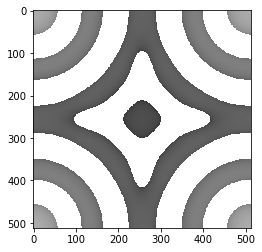

In [110]:
plt.imshow(1+np.log(spatial_filter),cmap='gray')

In [111]:
def conv2d(input_matrix, kernel,same=False):
    output = np.zeros([input_matrix.shape[0]+kernel.shape[0]-1, input_matrix.shape[1]+kernel.shape[1]-1])
    #Rotating kernel by 180
    rotated_kernel = np.zeros(kernel.shape)
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            rotated_kernel[i][j] = kernel[kernel.shape[0]-1-i][kernel.shape[1]-1-j]
    
    padded_img = np.zeros([input_matrix.shape[0] + 4, input_matrix.shape[1] + 4])
    padded_img[2:2+input_matrix.shape[0], 2:2+input_matrix.shape[1]] = input_matrix
    
    for centre_row in range(output.shape[0]):
        for centre_col in range(output.shape[1]):
            padding_submat = padded_img[centre_row:kernel.shape[0]+centre_row, centre_col:kernel.shape[1]+centre_col]
            product = rotated_kernel.flatten().dot(padding_submat.flatten())
            output[centre_row][centre_col] = product
            
    if same==True:
        limit_row=output.shape[0]-input_matrix.shape[0]
        limit_col=output.shape[1]-input_matrix.shape[1]
        output=output[limit_row-1:output.shape[0]-limit_row+1,limit_col-1:output.shape[1]-limit_col+1]
        
    return output

In [112]:
from scipy import signal
x=signal.fftconvolve(img,np.fft.ifftshift(spatial_filter),mode='same')

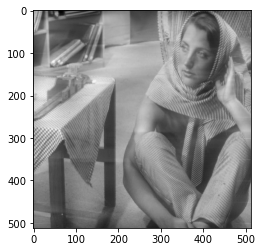

In [113]:
plt.imshow(x,cmap='gray')

In [114]:
img.shape

(512, 512)

In [115]:
img

array([[244, 255, 255, ..., 177, 179, 170],
       [180, 199, 200, ...,  91,  93,  91],
       [173, 190, 190, ...,  94,  94, 103],
       ...,
       [ 96,  97,  98, ..., 116, 115, 117],
       [ 95,  96,  97, ..., 114, 114, 117],
       [ 97,  98,  99, ..., 105, 108, 111]], dtype=uint8)

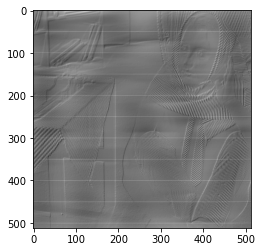

In [128]:
plt.imshow((img-x),cmap='gray')